In [1]:
import pandas as pd
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import numpy as np
import random
import math
import time
import lightgbm as lgb
data = pd.read_csv('../data/Bcard.txt')
data.head()

,obs_mth,bad_ind,uid,td_score,jxl_score,mj_score,rh_score,zzc_score,zcx_score,person_info,finance_info,credit_info,act_info
0,2018-10-31,0.0,A10000005,0.675349,0.144072,0.186899,0.483640,0.928328,0.369644,-0.322581,0.023810,0.00,0.217949
1,2018-07-31,0.0,A1000002,0.825269,0.398688,0.139396,0.843725,0.605194,0.406122,-0.128677,0.023810,0.00,0.423077
2,2018-09-30,0.0,A1000011,0.315406,0.629745,0.535854,0.197392,0.614416,0.320731,0.062660,0.023810,0.10,0.448718
3,2018-07-31,0.0,A10000481,0.002386,0.609360,0.366081,0.342243,0.870006,0.288692,0.078853,0.071429,0.05,0.179487
4,2018-07-31,0.0,A1000069,0.406310,0.405352,0.783015,0.563953,0.715454,0.512554,-0.261014,0.023810,0.00,0.423077


In [3]:
data['obs_mth'].value_counts()

2018-07-31    34030
2018-06-30    20565
2018-11-30    15975
2018-10-31    14527
2018-09-30    10709
Name: obs_mth, dtype: int64

In [4]:
df_train = data[data['obs_mth'] != '2018-11-30']
val = data[data['obs_mth'] == '2018-11-30']


In [5]:
df_train


,obs_mth,bad_ind,uid,td_score,jxl_score,mj_score,rh_score,zzc_score,zcx_score,person_info,finance_info,credit_info,act_info
0,2018-10-31,0.0,A10000005,0.675349,0.144072,0.186899,0.483640,0.928328,0.369644,-0.322581,0.023810,0.00,0.217949
1,2018-07-31,0.0,A1000002,0.825269,0.398688,0.139396,0.843725,0.605194,0.406122,-0.128677,0.023810,0.00,0.423077
2,2018-09-30,0.0,A1000011,0.315406,0.629745,0.535854,0.197392,0.614416,0.320731,0.062660,0.023810,0.10,0.448718
3,2018-07-31,0.0,A10000481,0.002386,0.609360,0.366081,0.342243,0.870006,0.288692,0.078853,0.071429,0.05,0.179487
4,2018-07-31,0.0,A1000069,0.406310,0.405352,0.783015,0.563953,0.715454,0.512554,-0.261014,0.023810,0.00,0.423077
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79826,2018-09-30,0.0,Ab99_96436392005147255,0.905578,0.927706,0.994447,0.315842,0.959443,0.042640,0.078853,0.071429,0.13,0.076923
79827,2018-10-31,0.0,Ab99_96436392005205003,0.639265,0.219267,0.845014,0.751332,0.275557,0.902642,0.078853,0.023810,0.00,0.076923
79828,2018-10-31,0.0,Ab99_96436392005412387,0.355061,0.837747,0.931882,0.442463,0.579277,0.740754,0.078853,0.023810,0.02,0.076923
79829,2018-10-31,0.0,Ab99_96436392006241624,0.797237,0.501238,0.490850,0.592068,0.479618,0.859870,0.078853,0.023810,0.00,0.076923


In [6]:
val


,obs_mth,bad_ind,uid,td_score,jxl_score,mj_score,rh_score,zzc_score,zcx_score,person_info,finance_info,credit_info,act_info
79831,2018-11-30,0.0,A10002345,0.123276,0.872117,0.723560,0.759074,0.184735,0.080376,-0.053718,0.047619,1.00,0.230769
79832,2018-11-30,0.0,A10003755,0.462460,0.157643,0.762271,0.481466,0.967006,0.780087,0.013863,0.023810,0.00,0.230769
79833,2018-11-30,0.0,A1000756,0.812642,0.400040,0.280942,0.099454,0.942880,0.588936,0.078853,0.023810,0.02,0.474359
79834,2018-11-30,0.0,A100085,0.007039,0.396036,0.857868,0.882255,0.345511,0.419969,-0.053718,0.047619,0.02,0.666667
79835,2018-11-30,0.0,A10008856,0.078063,0.291289,0.654864,0.528708,0.754482,0.732534,0.013863,0.023810,0.00,0.230769
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95801,2018-11-30,0.0,Ab99_96436391998107976,0.890233,0.442687,0.802687,0.776982,0.638971,0.605522,0.078853,0.142857,0.25,0.076923
95802,2018-11-30,0.0,Ab99_96436391998176292,0.161840,0.495766,0.085750,0.536738,0.596144,0.132972,0.078853,0.023810,0.00,0.076923
95803,2018-11-30,0.0,Ab99_96436391998322771,0.746522,0.732739,0.025475,0.831805,0.642904,0.029297,0.078853,0.023810,0.00,0.076923
95804,2018-11-30,0.0,Ab99_96436391998973383,0.176846,0.749610,0.933879,0.506921,0.867099,0.751643,0.078853,0.023810,0.02,0.076923


In [8]:
df_train = df_train.sort_values(by=['obs_mth'],ascending=False)
df_train

,obs_mth,bad_ind,uid,td_score,jxl_score,mj_score,rh_score,zzc_score,zcx_score,person_info,finance_info,credit_info,act_info
0,2018-10-31,0.0,A10000005,0.675349,0.144072,0.186899,0.483640,0.928328,0.369644,-0.322581,0.023810,0.00,0.217949
33407,2018-10-31,0.0,A2810176,0.146055,0.079922,0.250568,0.045240,0.766906,0.413713,0.013863,0.023810,0.00,0.269231
33383,2018-10-31,0.0,A2807687,0.551366,0.300781,0.225007,0.045447,0.735733,0.684182,-0.261014,0.071429,0.03,0.269231
33379,2018-10-31,0.0,A2807232,0.708547,0.769513,0.928457,0.739716,0.947453,0.361551,-0.128677,0.047619,0.00,0.269231
33376,2018-10-31,0.0,A2806932,0.482248,0.116658,0.286273,0.056618,0.047024,0.890433,0.078853,0.047619,0.00,0.269231
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47112,2018-06-30,0.0,A4233575,0.723610,0.857182,0.117430,0.949779,0.280677,0.431667,0.078853,0.023810,0.00,0.166667
47109,2018-06-30,0.0,A4233356,0.636472,0.432827,0.423410,0.516783,0.678267,0.788935,-0.322581,0.023810,0.00,0.166667
47106,2018-06-30,0.0,A4232739,0.911809,0.871835,0.073466,0.433998,0.747908,0.962329,0.078853,0.023810,0.00,0.166667
47104,2018-06-30,0.0,A4232571,0.333640,0.771295,0.678957,0.305642,0.231494,0.020833,0.062660,0.047619,0.00,0.166667


In [9]:
#对训练集数据进行切分，为了更好地训练模型
df_train['rank'] = [i for i in range(df_train.shape[0])]
df_train

,obs_mth,bad_ind,uid,td_score,jxl_score,mj_score,rh_score,zzc_score,zcx_score,person_info,finance_info,credit_info,act_info,rank
0,2018-10-31,0.0,A10000005,0.675349,0.144072,0.186899,0.483640,0.928328,0.369644,-0.322581,0.023810,0.00,0.217949,0
33407,2018-10-31,0.0,A2810176,0.146055,0.079922,0.250568,0.045240,0.766906,0.413713,0.013863,0.023810,0.00,0.269231,1
33383,2018-10-31,0.0,A2807687,0.551366,0.300781,0.225007,0.045447,0.735733,0.684182,-0.261014,0.071429,0.03,0.269231,2
33379,2018-10-31,0.0,A2807232,0.708547,0.769513,0.928457,0.739716,0.947453,0.361551,-0.128677,0.047619,0.00,0.269231,3
33376,2018-10-31,0.0,A2806932,0.482248,0.116658,0.286273,0.056618,0.047024,0.890433,0.078853,0.047619,0.00,0.269231,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47112,2018-06-30,0.0,A4233575,0.723610,0.857182,0.117430,0.949779,0.280677,0.431667,0.078853,0.023810,0.00,0.166667,79826
47109,2018-06-30,0.0,A4233356,0.636472,0.432827,0.423410,0.516783,0.678267,0.788935,-0.322581,0.023810,0.00,0.166667,79827
47106,2018-06-30,0.0,A4232739,0.911809,0.871835,0.073466,0.433998,0.747908,0.962329,0.078853,0.023810,0.00,0.166667,79828
47104,2018-06-30,0.0,A4232571,0.333640,0.771295,0.678957,0.305642,0.231494,0.020833,0.062660,0.047619,0.00,0.166667,79829


In [10]:
df_train.shape[1]

14

In [11]:
df_train['rank'] = pd.cut(df_train['rank'],bins=5,labels=[i for i in range(5)])
df_train

,obs_mth,bad_ind,uid,td_score,jxl_score,mj_score,rh_score,zzc_score,zcx_score,person_info,finance_info,credit_info,act_info,rank
0,2018-10-31,0.0,A10000005,0.675349,0.144072,0.186899,0.483640,0.928328,0.369644,-0.322581,0.023810,0.00,0.217949,0
33407,2018-10-31,0.0,A2810176,0.146055,0.079922,0.250568,0.045240,0.766906,0.413713,0.013863,0.023810,0.00,0.269231,0
33383,2018-10-31,0.0,A2807687,0.551366,0.300781,0.225007,0.045447,0.735733,0.684182,-0.261014,0.071429,0.03,0.269231,0
33379,2018-10-31,0.0,A2807232,0.708547,0.769513,0.928457,0.739716,0.947453,0.361551,-0.128677,0.047619,0.00,0.269231,0
33376,2018-10-31,0.0,A2806932,0.482248,0.116658,0.286273,0.056618,0.047024,0.890433,0.078853,0.047619,0.00,0.269231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47112,2018-06-30,0.0,A4233575,0.723610,0.857182,0.117430,0.949779,0.280677,0.431667,0.078853,0.023810,0.00,0.166667,4
47109,2018-06-30,0.0,A4233356,0.636472,0.432827,0.423410,0.516783,0.678267,0.788935,-0.322581,0.023810,0.00,0.166667,4
47106,2018-06-30,0.0,A4232739,0.911809,0.871835,0.073466,0.433998,0.747908,0.962329,0.078853,0.023810,0.00,0.166667,4
47104,2018-06-30,0.0,A4232571,0.333640,0.771295,0.678957,0.305642,0.231494,0.020833,0.062660,0.047619,0.00,0.166667,4


In [12]:
df_train['rank'].value_counts()


0    15967
1    15966
2    15966
3    15966
4    15966
Name: rank, dtype: int64

In [13]:
len(df_train)


79831

* LightGBM算法构建

In [14]:
def lgb_test(train_x,train_y,test_x,test_y):
    # 创建lgb对象
	clf =lgb.LGBMClassifier(boosting_type = 'gbdt',objective = 'binary',metric = 'auc',
		learning_rate = 0.3,n_estimators = 100,max_depth = 3,num_leaves = 20,
		max_bin = 45,min_data_in_leaf = 6,bagging_fraction = 0.6,bagging_freq = 0,
		feature_fraction = 0.8)
    # 使用这个对象训练lgb模型
	clf.fit(train_x,train_y,eval_set = [(train_x,train_y),(test_x,test_y)],eval_metric = 'auc')
    # 返回训练好的lgb模型, 返回最佳的分数
	return clf,clf.best_score_['valid_1']['auc']


In [36]:
feature_list = ['td_score', 'jxl_score', 'mj_score','rh_score', 'zzc_score', 'zcx_score', 'person_info', 'finance_info','credit_info', 'act_info']
feature_importance_lst = []
ks_train_lst = []
ks_test_lst = []
auc_list = []



In [37]:
for rk in range(5):
    #测试数据集
    ttest = df_train[df_train['rank'] == rk]
    #训练数据集
    ttrain = df_train[df_train['rank'] != rk]

    #准备训练集的x和y
    train_x = ttrain[feature_list]
    train_y = ttrain['bad_ind']

    #准备测试集的x和y
    test_x = ttest[feature_list]
    test_y = ttest['bad_ind']

    #模型训练
    model,auc = lgb_test(train_x,train_y,test_x,test_y)

    #保存结果
    feature_importance_df = pd.DataFrame({'name':model.feature_name_,'importance':model.feature_importances_})\
        .set_index('name')
    #保存刚刚的特征重要性结果
    feature_importance_lst.append(feature_importance_df)
    #保存auc值
    auc_list.append(auc)

    #模型预测
    y_pred_train = model.predict_proba(train_x)[:,1]
    y_pred_test = model.predict_proba(test_x)[:,1]

    #获取TPR，FPR
    fpr_train,tpr_train,_ = roc_curve(train_y,y_pred_train)
    fpr_test,tpr_test,_ = roc_curve(test_y,y_pred_test)

    #计算KS
    train_ks = abs(fpr_train - tpr_train).max()
    test_ks = abs(fpr_test - tpr_test).max()

    #保存ks值
    ks_train_lst.append(train_ks)
    ks_test_lst.append(test_ks)

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Info] Number of positive: 1054, number of negative

In [38]:
ks_train_lst


[0.5975672844852717,
 0.5783467616715372,
 0.5695855263126663,
 0.5709695906807863,
 0.5856241417665808]

In [39]:
ks_test_lst


[0.3853595242452872,
 0.4326870320933379,
 0.4998707279229346,
 0.48235428678191344,
 0.4097696111627038]

In [40]:
auc_list


[0.7537613522256793,
 0.7771178652722271,
 0.8143533492088516,
 0.7938591816154508,
 0.7697373502589315]

In [41]:
feature_importance_lst

[              importance
 name                    
 td_score              70
 jxl_score             71
 mj_score              71
 rh_score              71
 zzc_score             62
 zcx_score             67
 person_info           33
 finance_info          88
 credit_info           75
 act_info              86,
               importance
 name                    
 td_score              50
 jxl_score             66
 mj_score              88
 rh_score              62
 zzc_score             62
 zcx_score             66
 person_info           46
 finance_info          86
 credit_info           80
 act_info              88,
               importance
 name                    
 td_score              68
 jxl_score             64
 mj_score              64
 rh_score              75
 zzc_score             69
 zcx_score             55
 person_info           36
 finance_info          82
 credit_info           91
 act_info              81,
               importance
 name                    
 td_score

In [42]:
pd.concat(feature_importance_lst,axis=1)

,importance,importance,importance,importance,importance
name,,,,,
td_score,70,50,68,58,64
jxl_score,71,66,64,70,65
mj_score,71,88,64,79,86
rh_score,71,62,75,66,78
zzc_score,62,62,69,79,77
zcx_score,67,66,55,65,73
person_info,33,46,36,54,35
finance_info,88,86,82,71,70
credit_info,75,80,91,70,62


In [44]:
#取特征重要性的平均结果
feature_importance = pd.concat(feature_importance_lst,axis=1).mean(1)

In [46]:
feature_importance = feature_importance.sort_values(ascending=False)
feature_importance

name
act_info        84.8
finance_info    79.4
mj_score        77.6
credit_info     75.6
rh_score        70.4
zzc_score       69.8
jxl_score       67.2
zcx_score       65.2
td_score        62.0
person_info     40.8
dtype: float64

In [47]:
lst = ['person_info','finance_info','credit_info','act_info']
#划分训练集和验证集
train = data[data['obs_mth'] != '2018-11-30'].reset_index().copy()
evl = data[data['obs_mth'] == '2018-11-30'].reset_index().copy()

#准备训练集和测试集的x、y
x = train[lst]
y = train['bad_ind']

evl_x = evl[lst]
evl_y = evl['bad_ind']

#模型训练
model ,auc = lgb_test(x,y,evl_x,evl_y)

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Info] Number of positive: 1470, number of negative

In [48]:
auc


0.7787647675000429

In [49]:
#模型预测，计算ks
y_pred = model.predict_proba(x)[:,1]
fpr_lgb_train, tpr_lgb_train, _ = roc_curve(y,y_pred)
train_ks = abs(fpr_lgb_train - tpr_lgb_train).max()
print('train_ks:',train_ks)

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
train_ks: 0.5112871467802036


In [50]:
y_pred = model.predict_proba(evl_x)[:,1]
fpr_lgb, tpr_lgb, _ = roc_curve(evl_y,y_pred)
evl_ks = abs(fpr_lgb - tpr_lgb).max()
print('evl_ks:',evl_ks)


[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
evl_ks: 0.4302554685929041


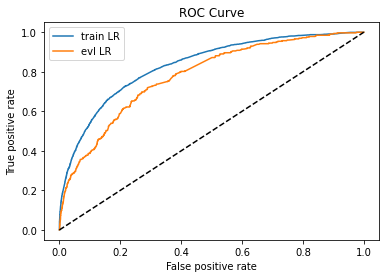

In [51]:
from matplotlib import pyplot as plt
plt.plot(fpr_lgb_train,tpr_lgb_train,label = 'train LR')
plt.plot(fpr_lgb,tpr_lgb,label = 'evl LR')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc = 'best')
plt.show()


* 评分映射


In [55]:
evl['xbeta'] = model.predict_proba(evl_x)[:,1]
evl

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


,index,obs_mth,bad_ind,uid,td_score,jxl_score,mj_score,rh_score,zzc_score,zcx_score,person_info,finance_info,credit_info,act_info,xbeta
0,79831,2018-11-30,0.0,A10002345,0.123276,0.872117,0.723560,0.759074,0.184735,0.080376,-0.053718,0.047619,1.00,0.230769,0.104260
1,79832,2018-11-30,0.0,A10003755,0.462460,0.157643,0.762271,0.481466,0.967006,0.780087,0.013863,0.023810,0.00,0.230769,0.004736
2,79833,2018-11-30,0.0,A1000756,0.812642,0.400040,0.280942,0.099454,0.942880,0.588936,0.078853,0.023810,0.02,0.474359,0.016706
3,79834,2018-11-30,0.0,A100085,0.007039,0.396036,0.857868,0.882255,0.345511,0.419969,-0.053718,0.047619,0.02,0.666667,0.010245
4,79835,2018-11-30,0.0,A10008856,0.078063,0.291289,0.654864,0.528708,0.754482,0.732534,0.013863,0.023810,0.00,0.230769,0.004736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15970,95801,2018-11-30,0.0,Ab99_96436391998107976,0.890233,0.442687,0.802687,0.776982,0.638971,0.605522,0.078853,0.142857,0.25,0.076923,0.085003
15971,95802,2018-11-30,0.0,Ab99_96436391998176292,0.161840,0.495766,0.085750,0.536738,0.596144,0.132972,0.078853,0.023810,0.00,0.076923,0.015709
15972,95803,2018-11-30,0.0,Ab99_96436391998322771,0.746522,0.732739,0.025475,0.831805,0.642904,0.029297,0.078853,0.023810,0.00,0.076923,0.015709
15973,95804,2018-11-30,0.0,Ab99_96436391998973383,0.176846,0.749610,0.933879,0.506921,0.867099,0.751643,0.078853,0.023810,0.02,0.076923,0.022099


In [56]:
#自定义评分映射函数
def score(xbeta):
    #score  = 600 + 50log2(P正样本/P负样本)
    #正样本：不违约概率，负样本：违约概率
    score = 600 + 50 * math.log2((1 - xbeta)/xbeta)
    return score
evl['score'] = evl.apply(lambda x:score(x['xbeta']),axis=1)
evl

,index,obs_mth,bad_ind,uid,td_score,jxl_score,mj_score,rh_score,zzc_score,zcx_score,person_info,finance_info,credit_info,act_info,xbeta,score
0,79831,2018-11-30,0.0,A10002345,0.123276,0.872117,0.723560,0.759074,0.184735,0.080376,-0.053718,0.047619,1.00,0.230769,0.104260,755.145015
1,79832,2018-11-30,0.0,A10003755,0.462460,0.157643,0.762271,0.481466,0.967006,0.780087,0.013863,0.023810,0.00,0.230769,0.004736,985.762236
2,79833,2018-11-30,0.0,A1000756,0.812642,0.400040,0.280942,0.099454,0.942880,0.588936,0.078853,0.023810,0.02,0.474359,0.016706,893.960961
3,79834,2018-11-30,0.0,A100085,0.007039,0.396036,0.857868,0.882255,0.345511,0.419969,-0.053718,0.047619,0.02,0.666667,0.010245,929.703744
4,79835,2018-11-30,0.0,A10008856,0.078063,0.291289,0.654864,0.528708,0.754482,0.732534,0.013863,0.023810,0.00,0.230769,0.004736,985.762236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15970,95801,2018-11-30,0.0,Ab99_96436391998107976,0.890233,0.442687,0.802687,0.776982,0.638971,0.605522,0.078853,0.142857,0.25,0.076923,0.085003,771.409354
15971,95802,2018-11-30,0.0,Ab99_96436391998176292,0.161840,0.495766,0.085750,0.536738,0.596144,0.132972,0.078853,0.023810,0.00,0.076923,0.015709,898.471700
15972,95803,2018-11-30,0.0,Ab99_96436391998322771,0.746522,0.732739,0.025475,0.831805,0.642904,0.029297,0.078853,0.023810,0.00,0.076923,0.015709,898.471700
15973,95804,2018-11-30,0.0,Ab99_96436391998973383,0.176846,0.749610,0.933879,0.506921,0.867099,0.751643,0.078853,0.023810,0.02,0.076923,0.022099,873.382789


In [57]:
#计算验证集上的ks值
fpr,tpr,_ = roc_curve(evl_y,evl['score'])
val_ks = abs(fpr - tpr).max()
val_ks

0.4302554685929041

* 模型报告


In [58]:
# 把验证集的数据代入到训练好的模型, 输出违约率, 把所有的用户的违约率按从大到小排序, 然后均匀划分成20箱
# 计算每一箱的跟违约相关的指标, 违约率和 KS
bins = 20
temp_df = pd.DataFrame() # 准备空白的df
# 用训练好的模型, 输出测试集的违约率
temp_df['bad_rate_predict'] = model.predict_proba(evl_x)[:,1] # 模型预测的违约率
temp_df['real_bad']= evl_y.values # 真实的标签

temp_df = temp_df.sort_values('bad_rate_predict',ascending=False)

temp_df['num'] = [i for i in range(temp_df.shape[0])]
temp_df['num'] = pd.cut(temp_df['num'],bins = bins,labels=[i for i in range(bins)])



# 创建报告
report = pd.DataFrame()
# 每一组有多少1 bad标签 , 每一组有多少0 good标签
report['BAD'] =temp_df.groupby('num')['real_bad'].sum().astype(int)
report['GOOD'] =temp_df.groupby('num')['real_bad'].count().astype(int)-report['BAD']
# 累计求和 累计到这一组, 有多少1, 多少0
report['BAD_CNT'] = report['BAD'].cumsum()
report['GOOD_CNT'] = report['GOOD'].cumsum()
# 计算累计到当前组, 出现的1标签的比例
good_total = report['GOOD_CNT'].max()
bad_total = report['BAD_CNT'].max()
report['BAD_PCTG'] = round(report['BAD_CNT']/bad_total,3)
# 当前组 1标签比例
report['BADRATE'] = report.apply(lambda x:round(x['BAD']/(x['BAD']+x['GOOD']),3),axis = 1)
# 当前组ks
def cal_ks(x):
	# tpr = tp/tp+fn(所有的1标签)  fpr = fp/fp+tn (所有的0) GOOD_CNT
	ks = (x['BAD_CNT']/bad_total)-(x['GOOD_CNT']/good_total)
	return round(abs(ks),3)
report['KS'] = report.apply(cal_ks,axis = 1)
report



[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


,BAD,GOOD,BAD_CNT,GOOD_CNT,BAD_PCTG,BADRATE,KS
num,,,,,,,
0,94,705,94,705,0.287,0.118,0.242
1,32,767,126,1472,0.384,0.040,0.290
2,29,770,155,2242,0.473,0.036,0.329
3,31,767,186,3009,0.567,0.039,0.375
4,28,771,214,3780,0.652,0.035,0.411
5,22,777,236,4557,0.720,0.028,0.428
6,9,789,245,5346,0.747,0.011,0.405
7,16,783,261,6129,0.796,0.020,0.404
8,9,790,270,6919,0.823,0.011,0.381


In [59]:
from pyecharts.charts import *
from pyecharts import options as opts
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
np.set_printoptions(suppress=True)
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
line = (

    Line()
    .add_xaxis(list(report.index))
    .add_yaxis(
        "分组坏人占比",
        list(report.BADRATE),
        yaxis_index=0,
        color="red",
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="评分卡模型表现"),
    )
    .extend_axis(
        yaxis=opts.AxisOpts(
            name="累计坏人占比",
            type_="value",
            min_=0,
            max_=0.5,
            position="right",
            axisline_opts=opts.AxisLineOpts(
                linestyle_opts=opts.LineStyleOpts(color="red")
            ),
            axislabel_opts=opts.LabelOpts(formatter="{value}"),
        )

    )
    .add_yaxis(
        "KS",
        list(report['KS']),
        yaxis_index=1,
        color="blue",
        label_opts=opts.LabelOpts(is_show=False),
    )
)
line.render()


'D:\\code\\workspace2\\financial20\\day06\\render.html'